In [ ]:
import io
import os
import pandas as pd
from google.colab import files

In [ ]:
DATA_PATH = "/content/Amazon Store Sales Data.csv"
df = pd.read_csv(DATA_PATH)

In [ ]:
print("Shape:", df.shape)
df.head()

Shape: (5901, 22)


,ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,Return Status
0,4918,CA-2019-160304,01-01-2019,01-07-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,0,Online,Accepted
1,4919,CA-2019-160304,01-02-2019,01-07-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,FUR-BO-10004709,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,0,Online,Accepted
2,4920,CA-2019-160304,01-02-2019,01-07-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,TEC-PH-10000455,Technology,Phones,GE 30522EE2,231.98,2,67.2742,0,Cards,Accepted
3,3074,CA-2019-125206,01-03-2019,01-05-2019,First Class,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,OFF-ST-10003692,Office Supplies,Storage,Recycled Steel Personal File for Hanging File ...,114.46,2,28.6150,0,Online,Accepted
4,8604,US-2019-116365,01-03-2019,01-08-2019,Standard Class,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,TEC-AC-10002217,Technology,Accessories,Imation Clip USB flash drive - 8 GB,30.08,2,-5.2640,0,Online,Accepted


In [ ]:
import numpy as np

print("\n=== Basic Info ===")
df.info()


=== Basic Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             5901 non-null   int64  
 1   Order ID       5901 non-null   object 
 2   Order Date     5901 non-null   object 
 3   Ship Date      5901 non-null   object 
 4   Ship Mode      5901 non-null   object 
 5   Customer ID    5901 non-null   object 
 6   Customer Name  5901 non-null   object 
 7   Segment        5901 non-null   object 
 8   Country        5901 non-null   object 
 9   City           5901 non-null   object 
 10  State          5901 non-null   object 
 11  Region         5901 non-null   object 
 12  Product ID     5901 non-null   object 
 13  Category       5901 non-null   object 
 14  Sub-Category   5901 non-null   object 
 15  Product Name   5901 non-null   object 
 16  Sales          5901 non-null   float64
 17  Quantity       5901 non-null   i

In [ ]:
print("\n=== Top Rows ===")
print(df.head())


=== Top Rows ===
     ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0  4918  CA-2019-160304  01-01-2019  01-07-2019  Standard Class    BM-11575   
1  4919  CA-2019-160304  01-02-2019  01-07-2019  Standard Class    BM-11575   
2  4920  CA-2019-160304  01-02-2019  01-07-2019  Standard Class    BM-11575   
3  3074  CA-2019-125206  01-03-2019  01-05-2019     First Class    LR-16915   
4  8604  US-2019-116365  01-03-2019  01-08-2019  Standard Class    CA-12310   

       Customer Name    Segment        Country          City  ...  \
0      Brendan Murry  Corporate  United States  Gaithersburg  ...   
1      Brendan Murry  Corporate  United States  Gaithersburg  ...   
2      Brendan Murry  Corporate  United States  Gaithersburg  ...   
3       Lena Radford   Consumer  United States   Los Angeles  ...   
4  Christine Abelman  Corporate  United States   San Antonio  ...   

        Product ID         Category Sub-Category  \
0  FUR-BO-10004709        Furniture    B

In [ ]:
print("\n=== Missing values (count) ===")
print(df.isna().sum())


=== Missing values (count) ===
ID               0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Profit           0
Returns          0
Payment Mode     0
Return Status    0
dtype: int64


In [ ]:
print("\n=== Duplicates ===")
print(df.duplicated().sum())


=== Duplicates ===
0


In [ ]:
possible_date_cols = [c for c in df.columns if 'date' in c.lower() or 'order' in c.lower() or 'ship' in c.lower()]
for c in possible_date_cols:
    try:
        df[c] = pd.to_datetime(df[c], format='%d-%m-%Y', errors='coerce')
    except Exception:
        pass

In [ ]:
raw_df = df.copy()

In [ ]:
# 4.1 Remove duplicates
before = df.shape[0]
df = df.drop_duplicates()
after = df.shape[0]
print(f"Removed {before - after} duplicate rows")

Removed 0 duplicate rows


In [ ]:
# 4.2 Simple missing-value handling (tweak as needed)
# Numerical -> fill with median, Categorical -> fill with mode
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

for c in num_cols:
    df[c] = df[c].fillna(df[c].median())
for c in cat_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].mode()[0])

In [ ]:
# 4.3 Feature engineering for date columns
for c in df.select_dtypes(include=['datetime64[ns]', 'datetime64[ns, UTC]']).columns:
    df[c + '_year'] = df[c].dt.year
    df[c + '_month'] = df[c].dt.month
    df[c + '_day'] = df[c].dt.day
    df[c + '_dow'] = df[c].dt.dayofweek

In [ ]:
# 4.4 Outlier treatment (IQR capping) for numeric columns
for c in num_cols:
    q1, q3 = df[c].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    df[c] = np.clip(df[c], lower, upper)

print("Cleaning done. Current shape:", df.shape)

Cleaning done. Current shape: (5901, 38)


In [ ]:
df.head()

,ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Order Date_day,Order Date_dow,Ship Date_year,Ship Date_month,Ship Date_day,Ship Date_dow,Ship Mode_year,Ship Mode_month,Ship Mode_day,Ship Mode_dow
0,4918,NaT,2019-01-01,2019-07-01,NaT,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,1.0,1.0,2019.0,7.0,1.0,0.0,NaN,NaN,NaN,NaN
1,4919,NaT,2019-02-01,2019-07-01,NaT,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,1.0,4.0,2019.0,7.0,1.0,0.0,NaN,NaN,NaN,NaN
2,4920,NaT,2019-02-01,2019-07-01,NaT,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,1.0,4.0,2019.0,7.0,1.0,0.0,NaN,NaN,NaN,NaN
3,3074,NaT,2019-03-01,2019-05-01,NaT,LR-16915,Lena Radford,Consumer,United States,Los Angeles,...,1.0,4.0,2019.0,5.0,1.0,2.0,NaN,NaN,NaN,NaN
4,8604,NaT,2019-03-01,2019-08-01,NaT,CA-12310,Christine Abelman,Corporate,United States,San Antonio,...,1.0,4.0,2019.0,8.0,1.0,3.0,NaN,NaN,NaN,NaN


In [ ]:
## 5. Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

# Set a target — change this to 'Sales' or something else if 'Profit' doesn't exist
possible_targets = ["Profit", "Sales", "Revenue", "ProfitAmount", "Total_Profit", "Order_Profit"]
TARGET = None
for t in possible_targets:
    if t in df.columns:
        TARGET = t
        break
if TARGET is None:
    raise ValueError("Couldn't auto-detect a target column. Please set TARGET manually to one of your numeric columns.")

print("Target set to:", TARGET)


Target set to: Profit


In [ ]:
#Top 10 correlated to target (absolute)
print("\nTop 10 features most correlated with target:")
print(corr[TARGET].abs().sort_values(ascending=False).head(11))


Top 10 features most correlated with target:
Profit              1.000000
Profit_Margin       0.427698
Sales               0.390801
Quantity            0.189002
Ship Date_month     0.035935
Order Date_year     0.029167
Ship Date_dow       0.024733
Ship Date_year      0.020951
Ship Date_day       0.017966
Order Date_month    0.011348
ID                  0.009689
Name: Profit, dtype: float64


In [ ]:
# === 10 Visualizations for Amazon Store Sales Data ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

custom_palette = ["#BF5A76", "#73546D", "#594651", "#897475", "#A38A8B", "#BFADA6"]
sns.set_palette(custom_palette)
plt.rcParams["figure.figsize"] = (10, 5)
sns.set_style("whitegrid")

# 🛠 Ensure 'Order Date' is in datetime format (edit if needed)
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# 💡 Create Profit Margin if applicable
if {'Profit','Sales'}.issubset(df.columns):
    df['Profit_Margin'] = np.where(df['Sales'] != 0, df['Profit'] / df['Sales'], 0.0)

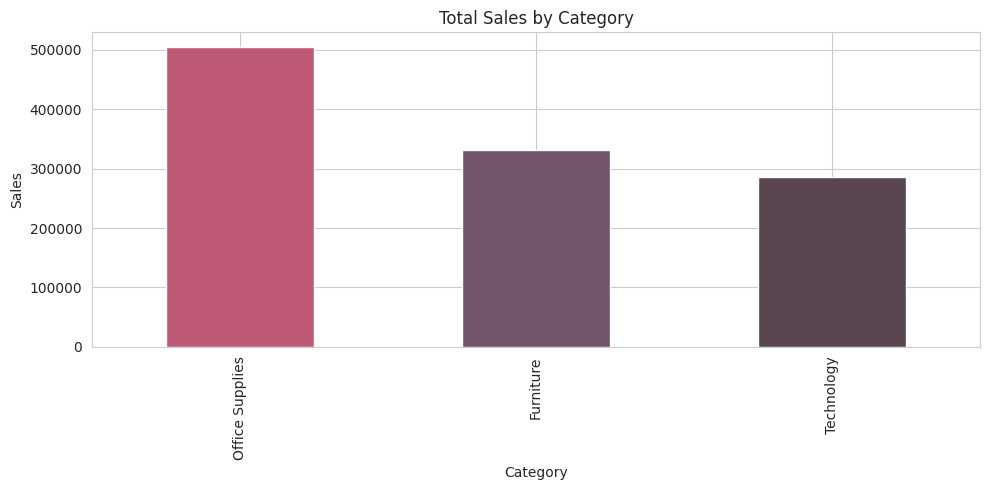

In [ ]:
# 1. Sales by Category
if {'Category','Sales'}.issubset(df.columns):
    plt.figure()
    df.groupby('Category')['Sales'].sum().sort_values(ascending=False).plot(kind='bar', color=custom_palette)
    plt.title('Total Sales by Category')
    plt.ylabel('Sales')
    plt.tight_layout()
    plt.show()

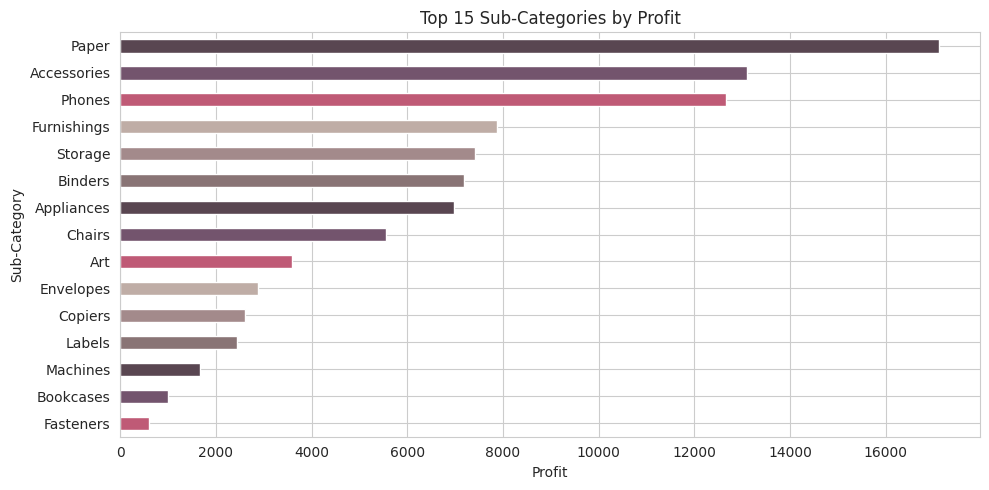

In [ ]:
# 2. Profit by Sub-Category (Top 15)
if {'Sub-Category','Profit'}.issubset(df.columns):
    plt.figure()
    df.groupby('Sub-Category')['Profit'].sum().sort_values().tail(15).plot(kind='barh', color=custom_palette)
    plt.title('Top 15 Sub-Categories by Profit')
    plt.xlabel('Profit')
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-23-2540836631.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()


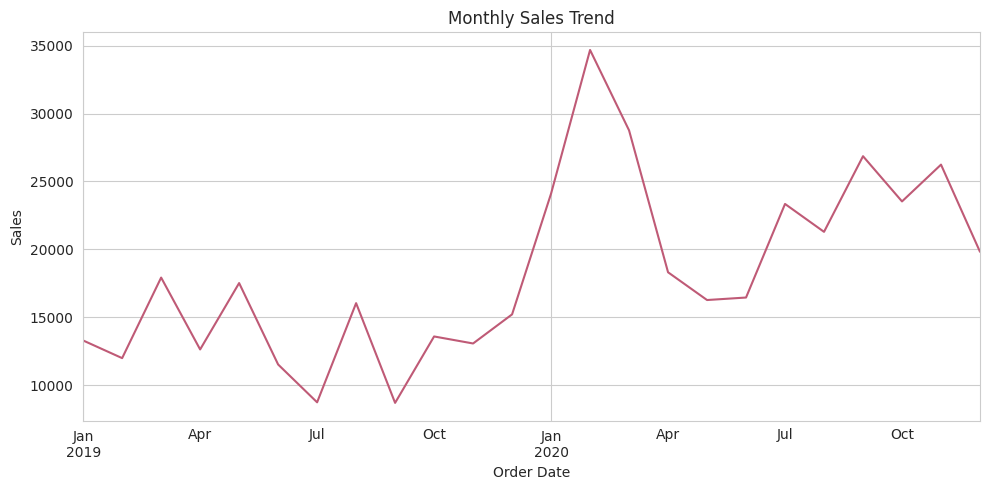

In [ ]:
# 3. Monthly Sales Trend
if 'Order Date' in df.columns and 'Sales' in df.columns:
    plt.figure()
    monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()
    monthly_sales.plot(color=custom_palette[0])
    plt.title('Monthly Sales Trend')
    plt.ylabel('Sales')
    plt.tight_layout()
    plt.show()

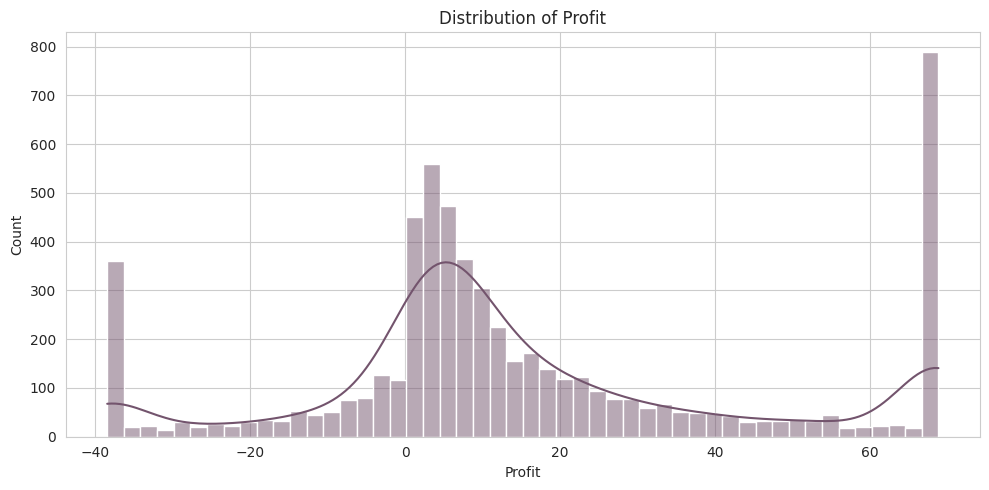

In [ ]:
# 4. Profit Distribution
if 'Profit' in df.columns:
    plt.figure()
    sns.histplot(df['Profit'], kde=True, bins=50, color=custom_palette[1])
    plt.title('Distribution of Profit')
    plt.xlabel('Profit')
    plt.tight_layout()
    plt.show()

In [ ]:
# 5. Discount vs Profit (Scatter + Trend)
if {'Discount','Profit'}.issubset(df.columns):
    plt.figure()
    sns.regplot(x='Discount', y='Profit', data=df,
                scatter_kws={'alpha':0.3, 'color':custom_palette[2]},
                line_kws={'color': custom_palette[0]})
    plt.title('Discount vs Profit')
    plt.tight_layout()
    plt.show()

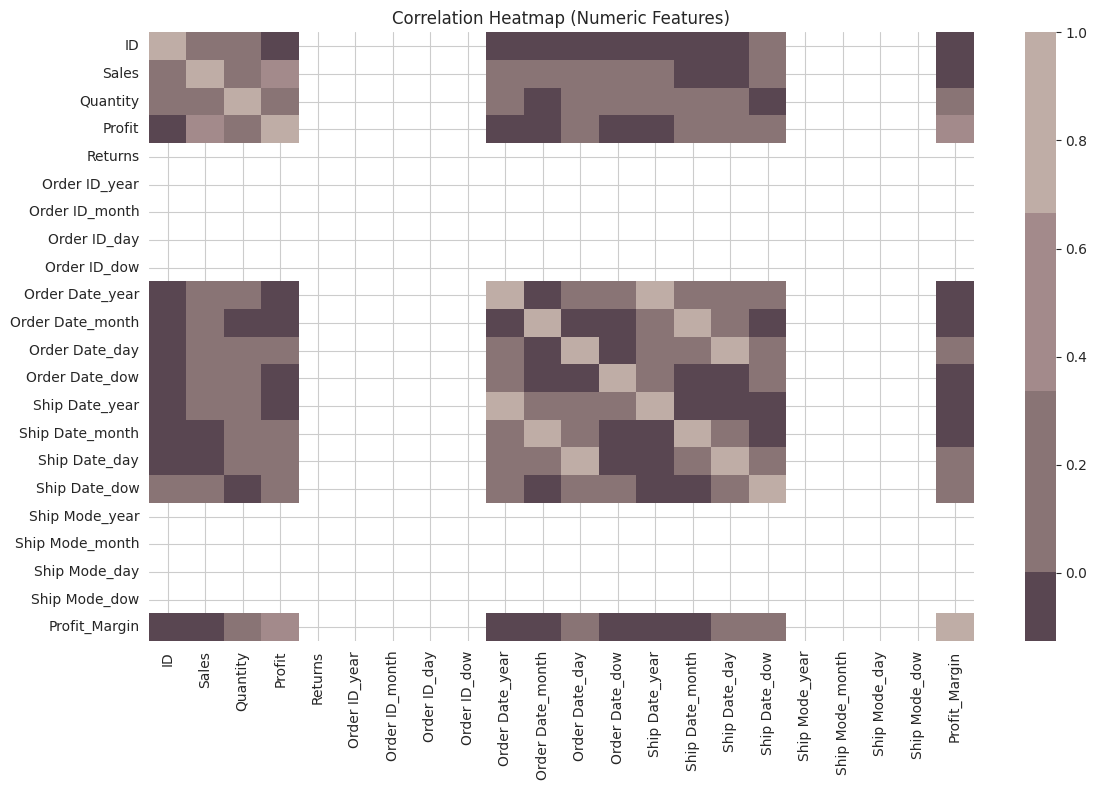

In [ ]:
# 6. Correlation Heatmap
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(num_cols) > 1:
    plt.figure(figsize=(12,8))
    corr = df[num_cols].corr()
    sns.heatmap(corr, cmap=sns.color_palette(custom_palette, as_cmap=True), annot=False, center=0)
    plt.title('Correlation Heatmap (Numeric Features)')
    plt.tight_layout()
    plt.show()


<Figure size 1000x500 with 0 Axes>

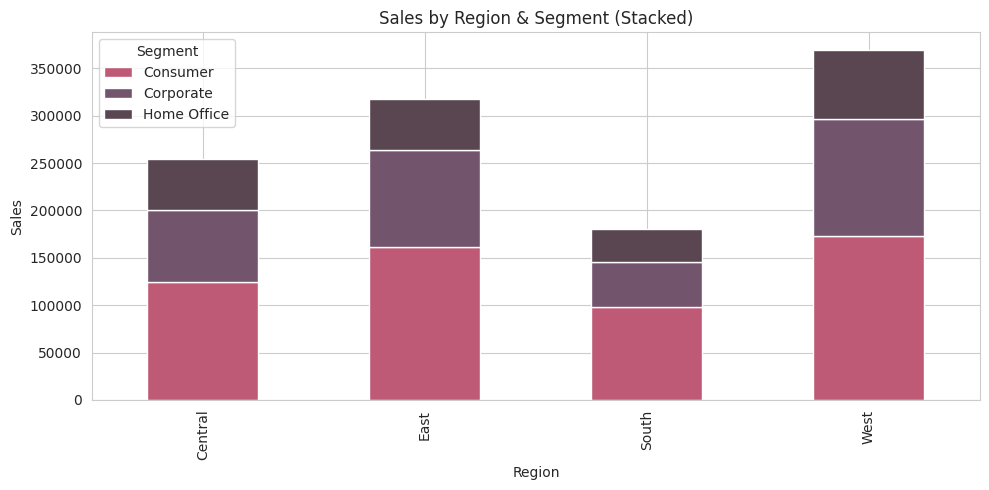

In [ ]:
# 7) Region x Segment – Stacked Sales Bar
if {'Region','Segment','Sales'}.issubset(df.columns):
    plt.figure()
    pvt = df.pivot_table(values='Sales', index='Region', columns='Segment', aggfunc='sum')
    pvt.plot(kind='bar', stacked=True)
    plt.title('Sales by Region & Segment (Stacked)')
    plt.ylabel('Sales')
    plt.tight_layout()
    plt.show()

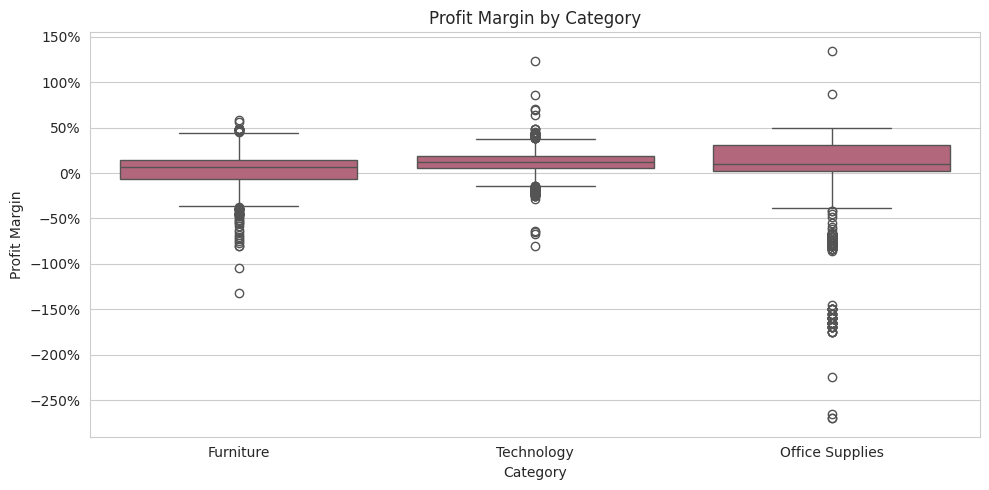

In [ ]:
# 8) Profit Margin by Category (Boxplot, % scale)
if {'Category','Profit_Margin'}.issubset(df.columns):
    plt.figure()
    ax = sns.boxplot(x='Category', y='Profit_Margin', data=df)
    ax.yaxis.set_major_formatter(PercentFormatter(1.0))
    plt.title('Profit Margin by Category')
    plt.xlabel('Category')
    plt.ylabel('Profit Margin')
    plt.tight_layout()
    plt.show()

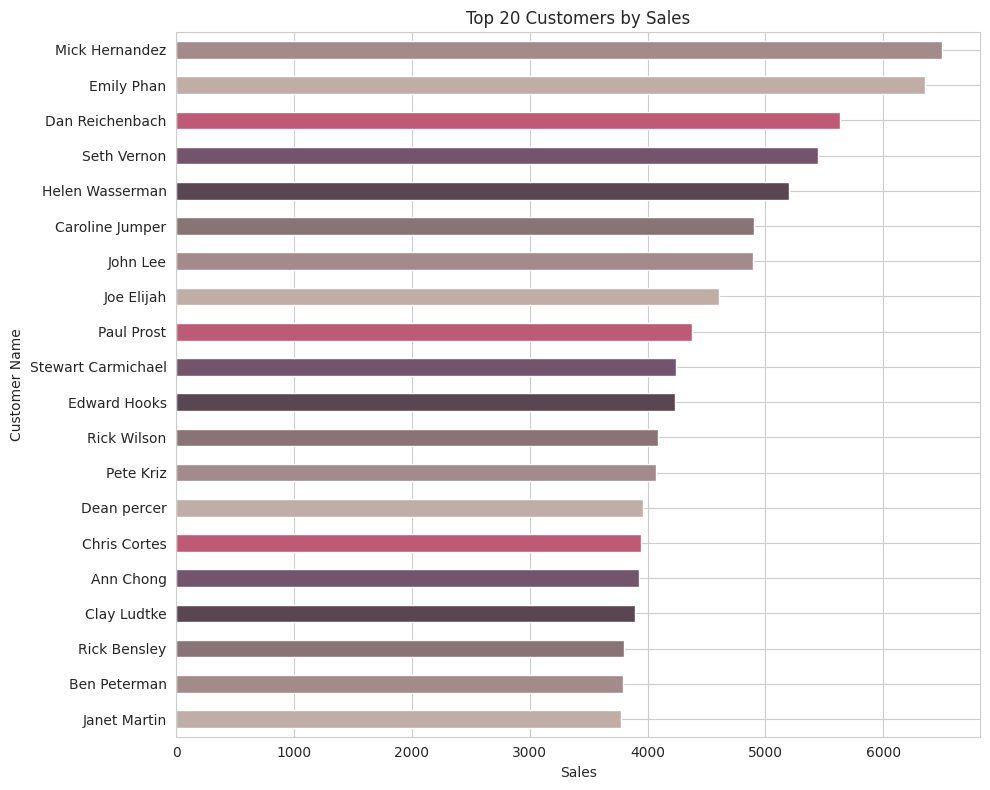

In [ ]:
# 9. Top 20 Customers by Sales
if {'Customer Name','Sales'}.issubset(df.columns):
    plt.figure(figsize=(10,8))
    top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values().tail(20)
    top_customers.plot(kind='barh', color=custom_palette[::-1])
    plt.title('Top 20 Customers by Sales')
    plt.xlabel('Sales')
    plt.tight_layout()
    plt.show()

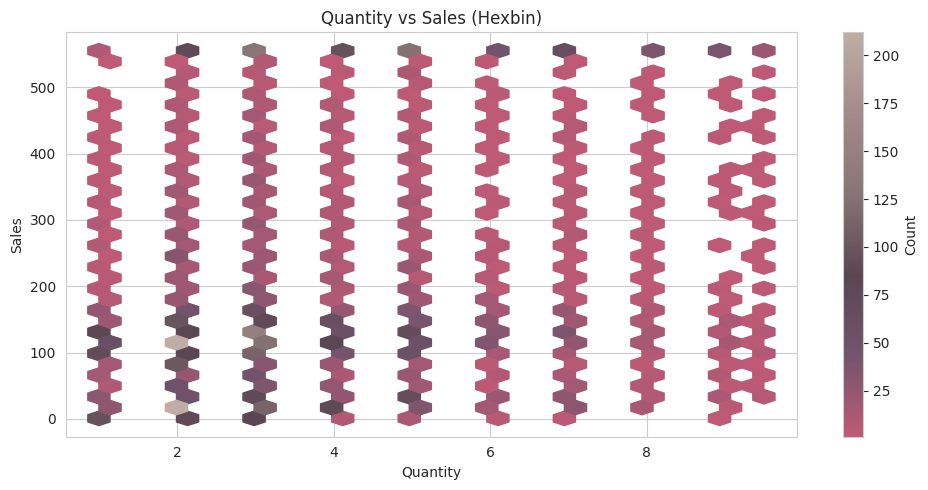

In [ ]:
# 10. Quantity vs Sales (Hexbin)
if {'Quantity','Sales'}.issubset(df.columns):
    from matplotlib.colors import LinearSegmentedColormap
    cmap = LinearSegmentedColormap.from_list("custom", custom_palette, N=256)
    plt.figure()
    plt.hexbin(df['Quantity'], df['Sales'], gridsize=30, cmap=cmap, mincnt=1)
    cb = plt.colorbar()
    cb.set_label('Count')
    plt.xlabel('Quantity')
    plt.ylabel('Sales')
    plt.title('Quantity vs Sales (Hexbin)')
    plt.tight_layout()
    plt.show()

In [ ]:
"""
## 6. Modelling
We will:
1. Split data into Train / Validation / Test
2. Build a preprocessing pipeline (OneHot for categoricals, scaling for numerics)
3. Train multiple models (Linear, Ridge, RandomForest, XGBoost)
4. Compare and pick the best on validation
5. Evaluate on held-out test
"""
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import joblib


In [ ]:
# X, y
y = df[TARGET]
X = df.drop(columns=[TARGET])

In [ ]:
# Update num/cat columns after feature eng
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Shapes:")
print("Train:", X_train.shape, y_train.shape)
print("Valid:", X_valid.shape, y_valid.shape)
print("Test :", X_test.shape,  y_test.shape)

Shapes:
Train: (4720, 38) (4720,)
Valid: (590, 38) (590,)
Test : (591, 38) (591,)


In [ ]:
# Preprocessor
num_transformer = Pipeline(steps=[("scaler", StandardScaler())])
cat_transformer = Pipeline(steps=[("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_cols),
        ("cat", cat_transformer, cat_cols),
    ]
)

In [ ]:
# Candidate models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1),
}

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import joblib
import os

# ---- helper so it works on any sklearn version ----
def rmse_score(y_true, y_pred):
    try:
        # sklearn >= 0.22
        return mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        # older sklearn
        return np.sqrt(mean_squared_error(y_true, y_pred))

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1),
}

# Try to add XGBoost
try:
    from xgboost import XGBRegressor
    models["XGBRegressor"] = XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        tree_method="hist",
        n_jobs=-1
    )
    xgb_available = True
except Exception as e:
    print("XGBoost not available:", e)
    xgb_available = False

results = []
best_model_name, best_valid_rmse, best_pipe = None, np.inf, None

for name, model in models.items():
    print(f"Training model: {name}")
    pipe = Pipeline([
        ("preprocess", preprocessor),
        ("model", model),
    ])

    try:
        if xgb_available and name == "XGBRegressor":
            pipe.fit(
                X_train, y_train,
                model__eval_set=[(X_valid, y_valid)],
                model__early_stopping_rounds=50,
                model__verbose=False
            )
        else:
            pipe.fit(X_train, y_train)

        y_pred_val = pipe.predict(X_valid)

        if not np.isfinite(y_pred_val).all():
            raise ValueError(f"{name} produced non-finite predictions on validation set.")

        rmse = rmse_score(y_valid, y_pred_val)
        mae  = mean_absolute_error(y_valid, y_pred_val)
        r2   = r2_score(y_valid, y_pred_val)

        results.append({"model": name, "RMSE": rmse, "MAE": mae, "R2": r2})
        print(f"{name:<18} | RMSE={rmse:.4f} | MAE={mae:.4f} | R2={r2:.4f}")

        if rmse < best_valid_rmse:
            best_valid_rmse = rmse
            best_model_name = name
            best_pipe = pipe

    except Exception as e:
        print(f"!! {name} failed: {e}")

# Leaderboard
if results:
    res_df = pd.DataFrame(results).sort_values("RMSE")
    print("\n=== Validation leaderboard ===")
    print(res_df)
else:
    print("\nNo models were successfully trained.")

# Test set
if best_pipe:
    y_pred_test = best_pipe.predict(X_test)
    rmse_test = rmse_score(y_test, y_pred_test)
    mae_test  = mean_absolute_error(y_test, y_pred_test)
    r2_test   = r2_score(y_test, y_pred_test)

    print(f"\n=== Test Metrics ({best_model_name}) ===")
    print(f"RMSE: {rmse_test:.4f}")
    print(f"MAE : {mae_test:.4f}")
    print(f"R2  : {r2_test:.4f}")

    os.makedirs("artifacts", exist_ok=True)
    joblib.dump(best_pipe, "artifacts/model.pkl")
    print("Saved model → artifacts/model.pkl")
else:
    print("\nNo best model was selected.")


Training model: LinearRegression
LinearRegression   | RMSE=26.9673 | MAE=19.3318 | R2=0.1953
Training model: Ridge
Ridge              | RMSE=21.9080 | MAE=15.6248 | R2=0.4689
Training model: RandomForest
RandomForest       | RMSE=1.6795 | MAE=0.6491 | R2=0.9969
Training model: XGBRegressor
!! XGBRegressor failed: XGBModel.fit() got an unexpected keyword argument 'early_stopping_rounds'

=== Validation leaderboard ===
              model       RMSE        MAE        R2
2      RandomForest   1.679457   0.649128  0.996879
1             Ridge  21.907986  15.624805  0.468916
0  LinearRegression  26.967318  19.331813  0.195300

=== Test Metrics (RandomForest) ===
RMSE: 1.7383
MAE : 0.5752
R2  : 0.9962
Saved model → artifacts/model.pkl
